'/Users/zaretcardenas/Documents/MaestriaDS/arquitectura/demo/04'# Predicting Housing Data

Datos:

* [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques)

In [1]:
import os
#os.chdir('/Users/zaretcardenas/Documents/MaestriaDS/arquitectura/demo/04/src')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import numpy as np
## variables saved in utils
from src.utils import variable_fillna_esp
from src.utils import drop_col_prepro
from src.utils import ordinal_col
from src.utils import level_col
from src.utils import drop_col_feat
from src.utils import fill_all_missing_values
from src.utils import saving_results
## Steps saved as function in the .py procesing 
from src.procesing import eda
from src.procesing import preprocesing
from src.procesing import featurizing
#import

## Load data

In [3]:
train_data = pd.read_csv("house-prices-data/train.csv")
test_data = pd.read_csv("house-prices-data/test.csv")
test_ids = test_data['Id']


Shape: (1460, 81)
Duplicated data : 0
Saving the graphs heat_map.png and boxplot.png


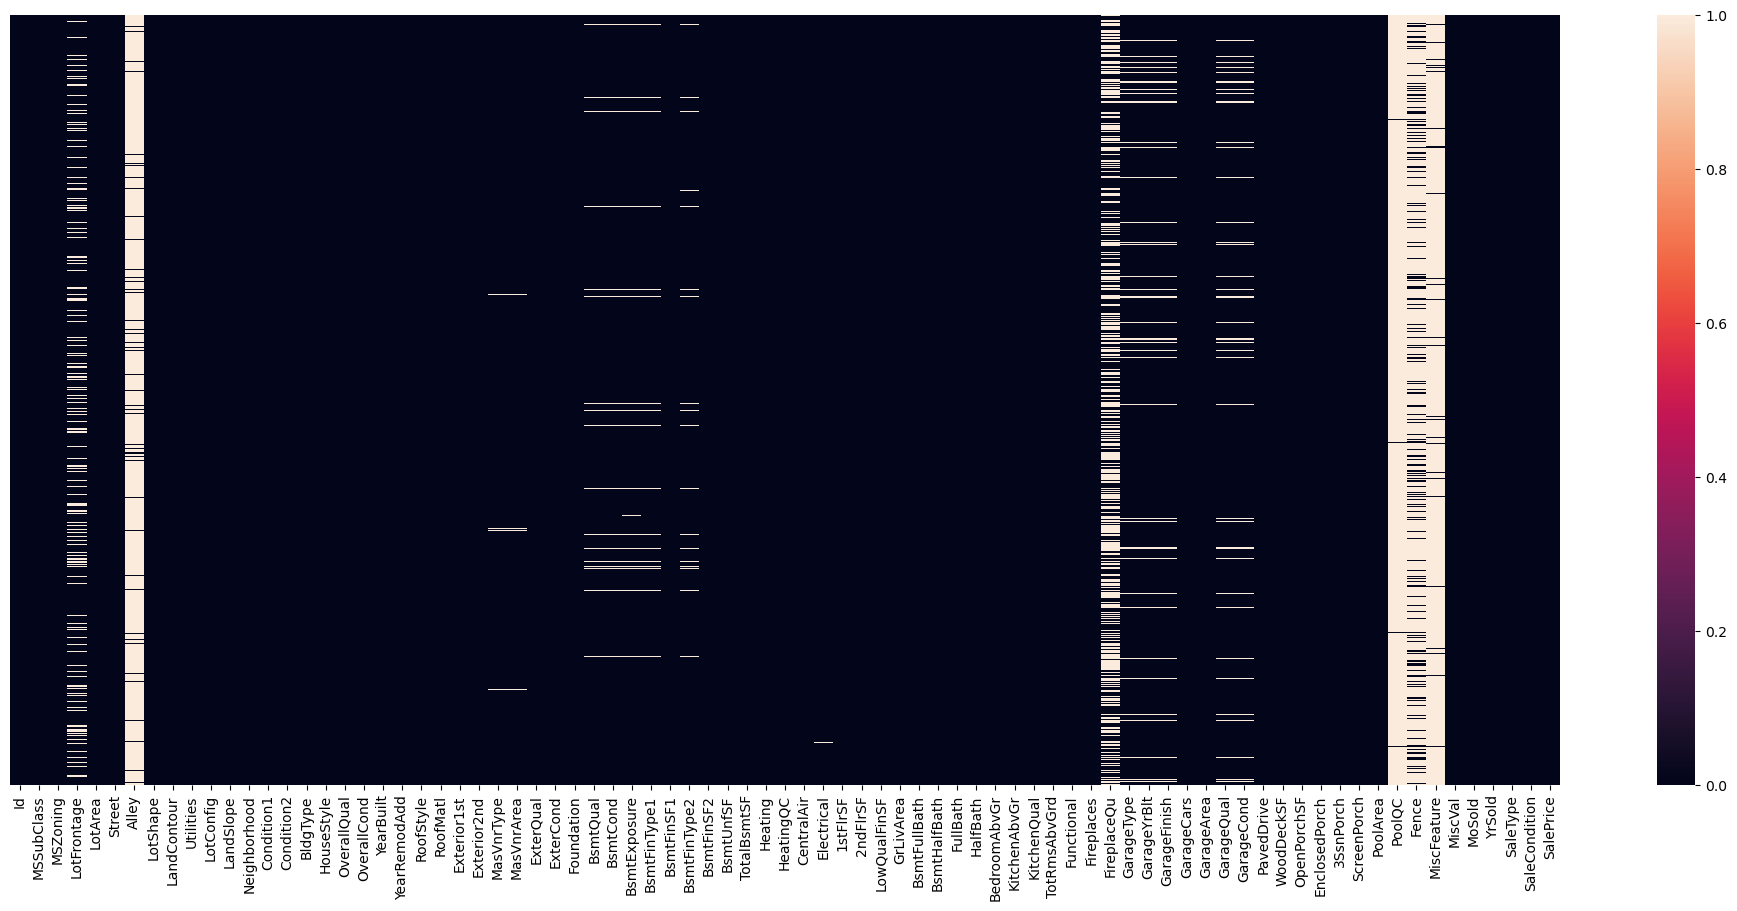

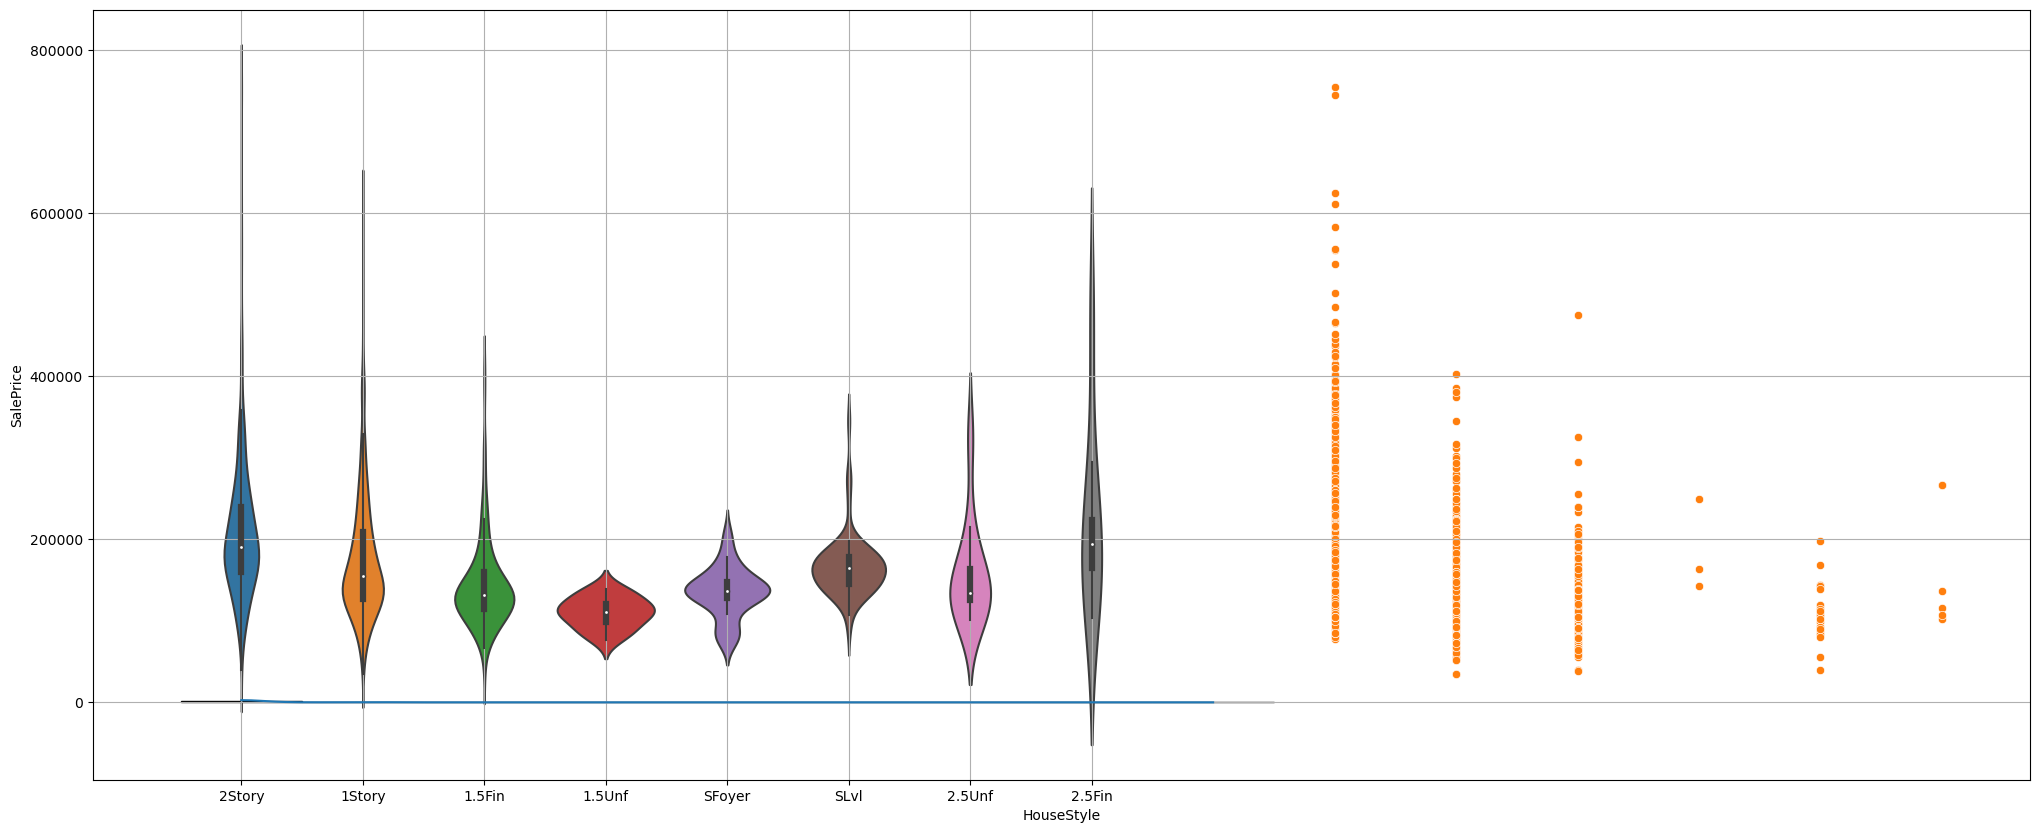

In [4]:
## Calling the graphs as EDA , this visualization for missing data is 
#not appropiate, it moght be better using barplot with the missing percentage 
eda(train_data,test_data)

In [5]:
## Calling the function preprocesing 
#In this step all the null values are treated also the ordinal encoder and lebel 

train_data_p,test_data_p=preprocesing(train_data,test_data,variable_fillna_esp,ordinal_col,level_col)

## Calling the function featurizing , all the features were created 
train_data_f,test_data_f=featurizing(train_data_p,test_data_p,drop_col_feat)


Preprocesing...
1460
1459
Feaurizing...
(1460, 35)


In [6]:
############ trainning the data 
## I rather prefere to keep this code instead of putting out in a function 


y = train_data_f['SalePrice']
X = train_data_f.drop(['SalePrice'], axis=1)


# in this case the nodes were in a loop but it only contains one node, so i decide break 
#that for ,in case that we want to use other hyperparameter I´ll proprose a pipeline but for this example
#is not necesary 

node=250 # Number of nodes to check 
model = RandomForestRegressor(max_leaf_nodes=node,)
model.fit(X, y)
score = cross_val_score(model, X, y, cv=10)
print('Score mean of cross validation',score.mean())

price = model.predict(test_data)




Score mean of cross validation 0.8465904318045373


In [7]:
##Saving the score and the name of pickle 
saving_results(test_ids,price)


Saving result/submission.csv 
